[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-1/simple-graph.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58238187-lesson-2-simple-graph)

In [24]:
%%capture --no-stderr
%pip install --quiet -U langgraph

In [25]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

In [ ]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": "Your message was: " + state['graph_state']} #change: prefixed string to original graph state

def exclamation_node(state):
    print("--Exclamation Node---")
    return {"graph_state": state['graph_state'] + " You sound very excited!"}

def question_node(state):
    print("---Question Node---")
    return {"graph_state": state['graph_state'] + " Good question."}

def thought_node(state):
    print("---Thought Node---")
    return {"graph_state": state['graph_state'] + " Thats an interesting thought."}

def shout_node(state):
    print("---Shout Node---")
    return {"graph_state": state['graph_state'] + " You seem angry. What's wrong?"}

def statement_node(state):
    print("--- Statement Node---")
    return {"graph_state": state['graph_state'] + " This is a standard statement."}

In [27]:
import random
from typing import Literal

def analyze_text_mood(state) -> Literal["exclamation_node", "question_node", "thought_node", "shout_node", "statement_node"]:
    user_input = state['graph_state'] 
    uppercase_check = user_input[18:]
    if user_input.endswith("?"):
        return "question_node"
    elif user_input.endswith("!"):
        return "exclamation_node"
    elif user_input.endswith("..."):
        return "thought_node"
    elif uppercase_check.isupper():
        return "shout_node"
    else:
        return "statement_node"

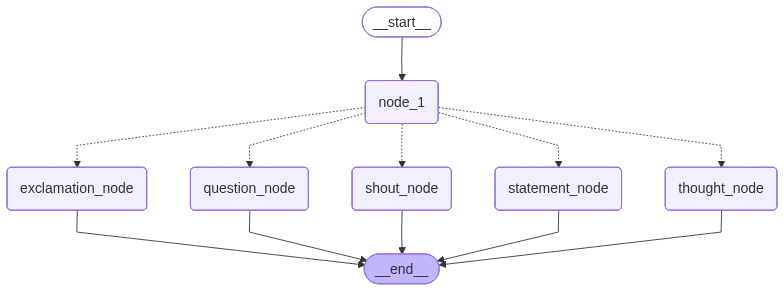

In [28]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("exclamation_node", exclamation_node)
builder.add_node("question_node", question_node)
builder.add_node("shout_node", shout_node)
builder.add_node("thought_node", thought_node)
builder.add_node("statement_node", statement_node)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", analyze_text_mood)
builder.add_edge("exclamation_node", END)
builder.add_edge("question_node", END)
builder.add_edge("shout_node", END)
builder.add_edge("thought_node", END)
builder.add_edge("statement_node", END)
# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
graph.invoke({"graph_state" : "I AM FUMING."})

---Node 1---
---Shout Node---


{'graph_state': "Your message was: I AM FUMING. You seem angry. What's wrong?"}

In [31]:
graph.invoke({"graph_state" : "I am fine."})

---Node 1---
--- Statement Node---


{'graph_state': 'Your message was: I am fine. This is a standard statement.'}

In [32]:
graph.invoke({"graph_state" : "Yay!"})

---Node 1---
--Exclamation Node---


{'graph_state': 'Your message was: Yay! You sound very excited!'}

In [34]:
graph.invoke({"graph_state" : "I wonder if I'm stupid..."})

---Node 1---
---Thought Node---


{'graph_state': "Your message was: I wonder if I'm stupid... Thats an interesting thought."}

In [35]:
graph.invoke({"graph_state" : "How could this happen?"})

---Node 1---
---Question Node---


{'graph_state': 'Your message was: How could this happen? Good question.'}